In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# Load the dataset
try:
    iris_data = load_iris(as_frame=True)  # returns a Bunch with data + target
    df = iris_data.frame  # full dataframe (features + target)
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please check the path.")
except Exception as e:
    print("❌ Error loading dataset:", e)

# Display the first few rows
print("\nFirst 10 rows of the dataset:")
print(df.head(10))

# Check dataset info
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Clean dataset (Iris has no missing values, but let's simulate handling)
df = df.dropna()  # would drop missing rows if any


✅ Dataset loaded successfully.

First 10 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       

In [2]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Grouping: Mean petal length by species
grouped = df.groupby("target")["petal length (cm)"].mean()
print("\nMean Petal Length per Species:")
print(grouped)

# Map target numbers to species names for clarity
df["species"] = df["target"].map(dict(zip(range(3), iris_data.target_names)))

# Insights
print("\n🔎 Insights:")
print("- Setosa generally has smaller petal lengths.")
print("- Virginica shows the largest petal lengths.")
print("- Versicolor lies in between.")



Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Mean Petal Length per Species:
target
0    1.462
1  

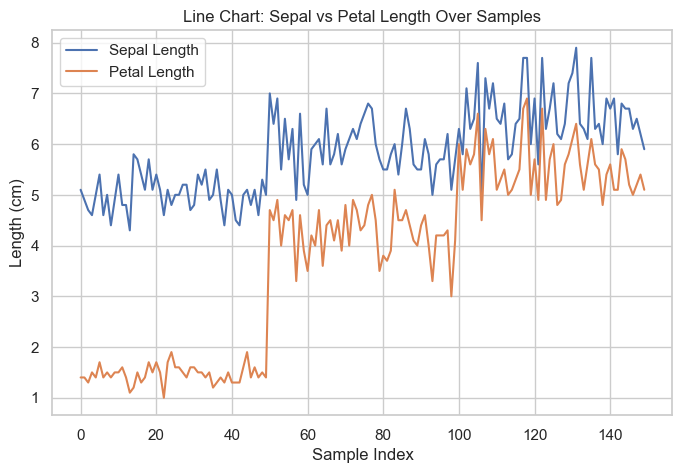

C:\Users\DELL\AppData\Local\Temp\ipykernel_13236\955168525.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="species", y="petal length (cm)", data=df, palette="viridis")


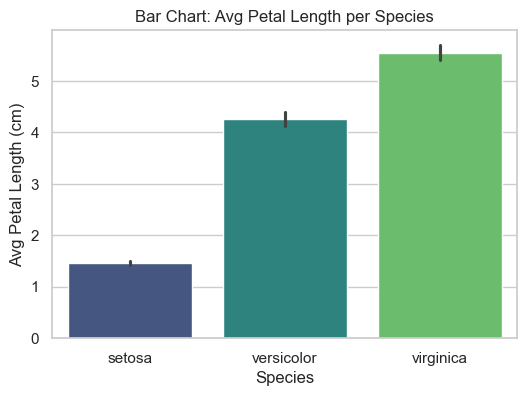

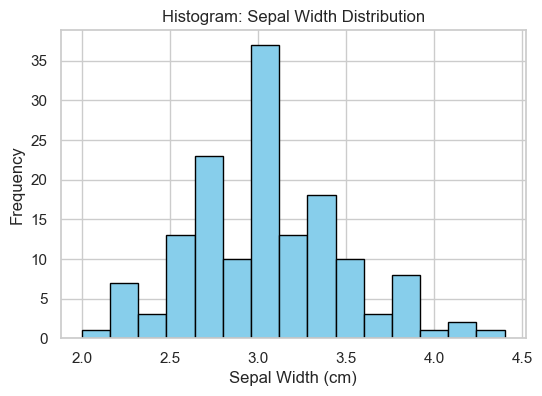

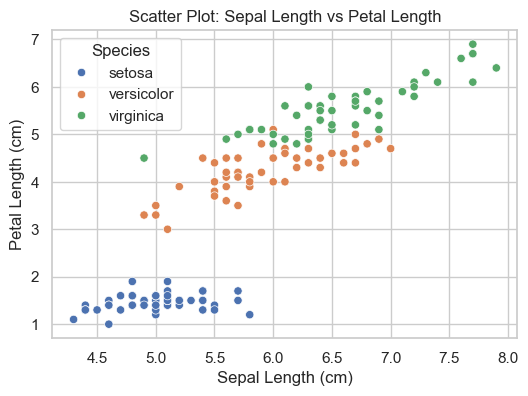

In [3]:
# Style
sns.set(style="whitegrid")

# 1. Line Chart: Simulate time trend using index
plt.figure(figsize=(8,5))
plt.plot(df.index, df["sepal length (cm)"], label="Sepal Length")
plt.plot(df.index, df["petal length (cm)"], label="Petal Length")
plt.title("Line Chart: Sepal vs Petal Length Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Length (cm)")
plt.legend()
plt.show()

# 2. Bar Chart: Average petal length per species
plt.figure(figsize=(6,4))
sns.barplot(x="species", y="petal length (cm)", data=df, palette="viridis")
plt.title("Bar Chart: Avg Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Avg Petal Length (cm)")
plt.show()

# 3. Histogram: Distribution of sepal width
plt.figure(figsize=(6,4))
plt.hist(df["sepal width (cm)"], bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot: Sepal length vs Petal length
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="sepal length (cm)", y="petal length (cm)",
    hue="species", data=df, palette="deep"
)
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()
